<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_dl/blob/main/01_CNN_cifar10_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_classes = 10 # 分類數量
img_size = 32 # 圖片尺寸

#### Load Dataset

In [3]:
# (訓練的input, 訓練的output), (測試的input, 測試應該要有的output答案)
(x_train, y_train), (x_val, y_val) = datasets.cifar10.load_data() 

170500096/170498071 [==============================] - 4s 0us/step


index:  10849
class: [4]


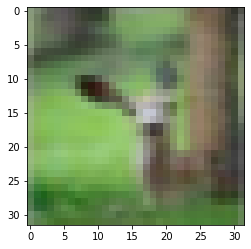

In [4]:
index = np.random.randint(x_train.shape[0])
print('index: ', index) # 要train的資料圖片index編號
img, label = x_train[index], y_train[index] #根據index編號，從x_train跟y_train叫出該圖片=img跟該圖片的答案=label
print('class:', label) # 秀出上面從y_train來的答案=label
plt.imshow(img) # 秀出上面從x_train來的圖片=img

#### Preprocess

In [5]:
# Normalization 0~1
x_train = x_train / 255.
x_val = x_val / 255.

# ont-hot encoding
y_train = utils.to_categorical(y_train, num_classes=num_classes) # 把data丟進去，並告訴它我要分幾類num_classes=
y_val = utils.to_categorical(y_val, num_classes=num_classes)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

#### Build Model

In [6]:
# 1
inputs = layers.Input(shape=(img_size, img_size, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs) # 第一次conv
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x) # 將第一次的conv進行第二次 conv
x = layers.MaxPooling2D(2)(x) # 進行一次Maxpooling
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x) # 將MaxPooling的結果再進行第一次conv
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x) # 將上面的結果再進行第二次conv
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x) # 做完了，最後一次進行Flatten，把特徵值取出來
x = layers.Dense(512, activation='relu')(x) # 特徵值取出來後，就用全連接層把特徵
prediction = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=prediction)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

#### Training

In [8]:
model.compile(loss=losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(), 
              metrics=['accuracy'])

In [9]:
logs = model.fit(x_train, y_train,
                batch_size=64,
                epochs=10,
                verbose=1,
                validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 37s 8ms/step - loss: 2.0746 - accuracy: 0.2450 - val_loss: 1.9357 - val_accuracy: 0.3035
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7403 - accuracy: 0.3801 - val_loss: 1.6455 - val_accuracy: 0.4081
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.5494 - accuracy: 0.4521 - val_loss: 1.7251 - val_accuracy: 0.3972
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4129 - accuracy: 0.4999 - val_loss: 1.3890 - val_accuracy: 0.4936
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.3097 - accuracy: 0.5336 - val_loss: 1.5589 - val_accuracy: 0.4566
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2177 - accuracy: 0.5705 - val_loss: 1.2995 - val_accuracy: 0.5467
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 1.1336 - accuracy: 0.6039 - val_loss: 1.4584 - val_accuracy: 0.4962
Epoch

#### Logs

In [10]:

history = logs.history

Text(0.5, 1.0, 'accuracy')

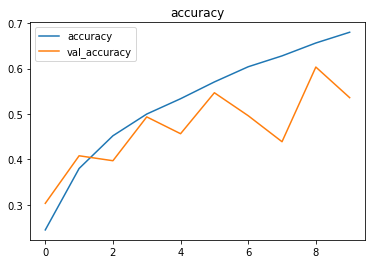

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

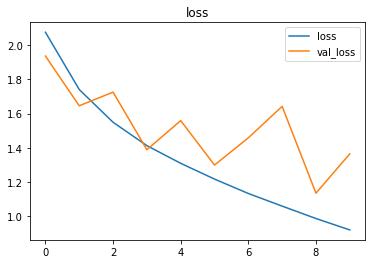

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Metrics

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_val, axis=-1)
prediction = model.predict(x_val)
y_pred = np.argmax(prediction, axis=-1)

print(y_true.shape, y_pred.shape)

(10000,) (10000,)


In [14]:
# classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1000
           1       0.75      0.52      0.61      1000
           2       0.63      0.37      0.47      1000
           3       0.47      0.28      0.35      1000
           4       0.70      0.31      0.43      1000
           5       0.48      0.61      0.54      1000
           6       0.63      0.67      0.65      1000
           7       0.63      0.66      0.64      1000
           8       0.87      0.38      0.53      1000
           9       0.31      0.94      0.47      1000

    accuracy                           0.54     10000
   macro avg       0.62      0.54      0.54     10000
weighted avg       0.62      0.54      0.54     10000



In [15]:
# Confusion matrix:
#   row: Ground truth
#   column: predict
print(confusion_matrix(y_true, y_pred))

[[613  29  21  11   3  10  15   8  25 265]
 [  2 517   1   8   0   1   5   2   1 463]
 [ 73   7 372  53  54 123 108  64   9 137]
 [ 18  15  40 282  30 270  72  56   7 210]
 [ 27   6  73  59 309 113 139 157   7 110]
 [  8   2  34  97  16 609  30  77   3 124]
 [  3   8  35  48   8  59 674  12   1 152]
 [  9   7   9  23  13  72  11 658   1 197]
 [112  69   7   9   6   9   4   9 383 392]
 [  3  31   2   4   0   5   4   7   2 942]]


#### Save model

In [16]:
# 1. save whole model and weights
model.save('my_model.h5')
model2 = models.load_model('my_model.h5')